In [11]:
import os
os.listdir('/content')


['.config', 'german.data', '.ipynb_checkpoints', 'sample_data']

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [14]:
columns = [
    'Status', 'Duration', 'Credit_history', 'Purpose', 'Credit_amount',
    'Savings', 'Employment', 'Installment_rate', 'Personal_status_sex',
    'Debtors', 'Residence_since', 'Property', 'Age',
    'Installment_plans', 'Housing', 'Existing_credits',
    'Job', 'People_liable', 'Telephone', 'Foreign_worker', 'Risk'
]

data = pd.read_csv(
    '/content/german.data',
    sep=' ',
    names=columns
)


In [15]:
data.head()


,Status,Duration,Credit_history,Purpose,Credit_amount,Savings,Employment,Installment_rate,Personal_status_sex,Debtors,...,Property,Age,Installment_plans,Housing,Existing_credits,Job,People_liable,Telephone,Foreign_worker,Risk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [16]:
data.shape


(1000, 21)

In [17]:
data['Risk'].value_counts()


,count
Risk,
1,700
2,300


In [18]:
data['Risk'] = data['Risk'].map({1: 1, 2: 0})


In [19]:
data['Risk'].value_counts()


,count
Risk,
1,700
0,300


In [20]:
data.isnull().sum()


,0
Status,0
Duration,0
Credit_history,0
Purpose,0
Credit_amount,0
Savings,0
Employment,0
Installment_rate,0
Personal_status_sex,0
Debtors,0


In [21]:
data_encoded = pd.get_dummies(data, drop_first=True)


In [22]:
X = data_encoded.drop('Risk', axis=1)
y = data_encoded['Risk']


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [26]:
from sklearn.linear_model import LogisticRegression


In [27]:
log_model = LogisticRegression(max_iter=2000)
log_model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=2000)

In [28]:
y_pred = log_model.predict(X_test_scaled)


In [29]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [30]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.795


In [31]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.67      0.59      0.63        59
           1       0.84      0.88      0.86       141

    accuracy                           0.80       200
   macro avg       0.76      0.74      0.74       200
weighted avg       0.79      0.80      0.79       200



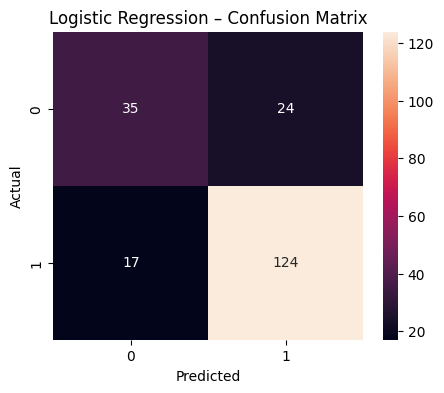

In [32]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression – Confusion Matrix")
plt.show()


In [33]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [34]:
rf_pred = rf_model.predict(X_test)


In [35]:
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_accuracy)


Random Forest Accuracy: 0.755


In [36]:
print(classification_report(y_test, rf_pred))


              precision    recall  f1-score   support

           0       0.65      0.37      0.47        59
           1       0.78      0.91      0.84       141

    accuracy                           0.76       200
   macro avg       0.71      0.64      0.66       200
weighted avg       0.74      0.76      0.73       200

